In [16]:
import pandas as pd 
import numpy as np

In [25]:
bill_df = pd.read_csv(r"C:\Users\tlsdu\Desktop\svm\bill_authentication.csv")

In [26]:
bill_df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Case #1: 2 Principal Components 

In [33]:
bill = bill_df.drop('Class', axis=1)
bill

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [28]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)

p_com_2 = pca_2.fit_transform(bill) 

bill_red_2 = pd.DataFrame(data=p_com_2, columns=['Principal Component 1', 'Principal Component 2'])

bill_red_2.head(5)

,Principal Component 1,Principal Component 2
0,-8.117954,-2.372615
1,-7.800124,-2.689555
2,3.690195,-4.372720
3,-9.908612,-0.978030
4,6.957545,-0.733813


In [29]:
#Calculate Explained Variance Ratio
print("Proportion of variance explained by two principal components is", 100*sum(pca_2.explained_variance_ratio_),"%")

Proportion of variance explained by two principal components is 90.32289954282113 %


# Case #2: 3 Principal Components 

In [30]:
pca_3 = PCA(n_components=3) 

p_com_3 = pca_3.fit_transform(bill)

bill_red_3 = pd.DataFrame(data = p_com_3, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

bill_red_3.head(5)

,Principal Component 1,Principal Component 2,Principal Component 3
0,-8.117954,-2.372615,1.192382
1,-7.800124,-2.689555,1.616302
2,3.690195,-4.372720,-0.166388
3,-9.908612,-0.978030,0.517427
4,6.957545,-0.733813,-0.480262


In [31]:
print("Proportion of variance explained by three principal components is", 100*sum(pca_3.explained_variance_ratio_),"%")

Proportion of variance explained by three principal components is 97.02466637184506 %


# Plot Explained Variance Ratio to Find the Optimal Number of Principal Components. 

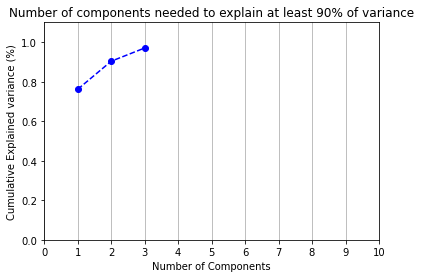

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
X = np.arange(1, 4, step=1)
y = np.cumsum(pca_3.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(X, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Cumulative Explained variance (%)')
plt.title('Number of components needed to explain at least 90% of variance')
ax.grid(axis='x')
plt.show()

Since over 90% of variance is already explained just by first 2 principal components, the optimal number of principal components for bill authentication dataset would be 2. 

# Build Models with Bill Authentication dataset reduced to 2 principal components.

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [24]:
lr = LogisticRegression(solver='liblinear')
svc = SVC(kernel='linear')

In [35]:
from sklearn.model_selection import train_test_split 
X = bill 
y = bill_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#fit Logistic Regression and Support Vector Classifer with training set. 
lr.fit(X_train, y_train)
svc.fit(X_train, y_train) 

SVC(kernel='linear')

## Validate Logistic Regression 

In [40]:
#find the test accuracy
y_preds_lr = lr.predict(X_test) 
print("Accuracy of logistic regression:", accuracy_score(y_test, y_preds_lr))

Accuracy of logistic regression: 0.9854545454545455


C:\Users\tlsdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


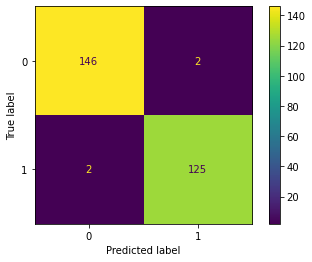

In [47]:
#build confusion matrix
print(plot_confusion_matrix(lr, X_test, y_test))

## Validate Support Vector Classifier

In [42]:
#find the test accuracy for Support Vector Classifier
y_preds_svc = svc.predict(X_test)
print("Accuracy of Support Vector Classifier", accuracy_score(y_test, y_preds_svc))

Accuracy of Support Vector Classifier 0.9854545454545455


C:\Users\tlsdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


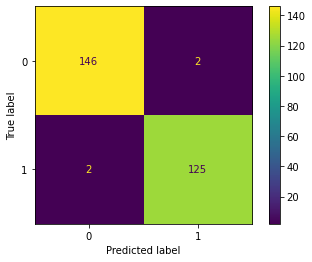

In [48]:
#build confusion matrix 
print(plot_confusion_matrix(svc, X_test, y_test))

Logistic Regression with 'liblinear' solver and Support Vector Classifier with linear kernel both achieved exactly same accuracy
of 98.55%. Both models only had 4 misclassified test samples out of 275 according to confusion matrix. 